In [87]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
import tensorflow as tf

(x_train_all, y_train_all), (x_test, y_test) = imdb.load_data(skip_top=20,num_words=100)


In [ ]:
print(x_train_all.shape, y_train_all.shape)


(25000,) (25000,)


In [ ]:
print(x_train_all[0])

[2, 2, 22, 2, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 2, 2, 36, 2, 2, 25, 2, 43, 2, 2, 50, 2, 2, 2, 35, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 39, 2, 2, 2, 2, 2, 2, 38, 2, 2, 2, 2, 50, 2, 2, 2, 2, 2, 2, 22, 2, 2, 2, 2, 2, 22, 71, 87, 2, 2, 43, 2, 38, 76, 2, 2, 2, 2, 22, 2, 2, 2, 2, 2, 2, 2, 2, 2, 62, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 66, 2, 33, 2, 2, 2, 2, 38, 2, 2, 25, 2, 51, 36, 2, 48, 25, 2, 33, 2, 22, 2, 2, 28, 77, 52, 2, 2, 2, 2, 82, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 2, 2, 2, 2, 2, 2, 88, 2, 2, 2, 2, 98, 32, 2, 56, 26, 2, 2, 2, 2, 2, 2, 2, 22, 21, 2, 2, 26, 2, 2, 2, 30, 2, 2, 51, 36, 28, 2, 92, 25, 2, 2, 2, 65, 2, 38, 2, 88, 2, 2, 2, 2, 2, 2, 2, 2, 32, 2, 2, 2, 2, 2, 32]


In [ ]:
for i in range(len(x_train_all)):
  x_train_all[i] = [w for w in x_train_all[i] if w>2]

print(x_train_all[0])

[22, 43, 65, 66, 36, 25, 43, 50, 35, 39, 38, 50, 22, 22, 71, 87, 43, 38, 76, 22, 62, 66, 33, 38, 25, 51, 36, 48, 25, 33, 22, 28, 77, 52, 82, 36, 71, 43, 26, 46, 88, 98, 32, 56, 26, 22, 21, 26, 30, 51, 36, 28, 92, 25, 65, 38, 88, 32, 32]


In [ ]:
word_to_index = imdb.get_word_index()
word_to_index['movie']

17

In [ ]:
index_to_word = {word_to_index[k]: k for k in word_to_index}

for w in x_train_all[0]:
  print(index_to_word[w-3], end=' ')


film just story really they you just there an from so there film film were great just so much film would really at so you what they if you at film have been good also they were just are out because them all up are film but are be what they have don't you story so because all all 

In [ ]:
print(len(x_train_all[0]), len(x_train_all[1]))

59 32


In [ ]:
print(y_train_all[:10])

[1 0 0 1 0 0 1 0 1 0]


In [ ]:
np.random.seed(42)
random_index = np.random.permutation(25000)

x_train = x_train_all[random_index[:20000]]
y_train = y_train_all[random_index[:20000]]
x_val = x_train_all[random_index[20000:]]
y_val = y_train_all[random_index[20000:]]


In [ ]:
from tensorflow.keras.preprocessing import sequence

maxlen = 100
x_train_seq = sequence.pad_sequences(x_train, maxlen=maxlen)
x_val_seq = sequence.pad_sequences(x_val, maxlen=maxlen)


In [ ]:
print(x_train_seq.shape, x_val_seq.shape)

(20000, 100) (5000, 100)


In [ ]:
print(x_train_seq[0])

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 35 40 27 28 40 22 83 31 85 45
 24 23 31 70 31 76 30 98 32 22 28 51 75 56 30 33 97 53 38 46 53 74 31 35
 23 34 22 58]


In [ ]:
from tensorflow.keras.utils import to_categorical
x_train_onehot = to_categorical(x_train_seq)
x_val_onehot = to_categorical(x_val_seq)


In [ ]:
print(x_train_onehot.shape)

(20000, 100, 100)


In [ ]:
print(x_train_onehot.nbytes)

1600000000


In [ ]:
class RecurrentNetwork:

  def __init__(self, n_cells=10, batch_size=32, learning_rate=0.1):
    self.n_cells = n_cells
    self.batch_size = batch_size
    self.w1h = None
    self.w1x = None
    self.b1 = None
    self.w2 = None
    self.b2 = None
    self.h = None
    self.losses = []
    self.val_losses =[]
    self.lr = learning_rate


  def forpass(self, x):
    self.h = [np.zeros((x.shape[0], self.n_cells))]
    seq = np.swapaxes(x,0,1)
    for x in seq:
      z1 = np.dot(x, self.w1x) + np.dot(self.h[-1],self.w1h) + self.b1
      h = np.tanh(z1)
      self.h.append(h)
      z2 = np.dot(h, self.w2) + self.b2
    return z2

  def backprop(self, x, err):
    m = len(x)

    w2_grad = np.dot(self.h[-1].T, err)/m
    b2_grad = np.sum(err, axis=0)/m
    seq = np.swapaxes(x,0,1)

    w1h_grad = w1x_grad= b1_grad=0

    err_to_cell = np.dot(err, self.w2.T) * (1-self.h[-1]**2)
    for x,h in zip(seq[::-1][:10], self.h[:-1][::-1][:10]):
      w1h_grad += np.dot(h.T, err_to_cell)
      w1x_grad += np.dot(x.T, err_to_cell)
      b1_grad += np.sum(err_to_cell, axis=0)

      err_to_cell = np.dot(err_to_cell, self.w1h) * (1-h**2)

    w1h_grad /= m
    w1x_grad /= m
    b1_grad /= m

    return w1h_grad, w1x_grad, b1_grad, w2_grad, b2_grad

  def sigmoid(self,z):
    z = np.clip(z, -100, None)
    a = 1/ (1+np.exp(-z))
    return a

  def init_weights(self, n_features, n_classes):
    orth_init = tf.initializers.Orthogonal()
    glorot_init = tf.initializers.GlorotUniform()

    self.w1h = orth_init((self.n_cells, self.n_cells)).numpy()
    self.w1x = glorot_init((n_features, self.n_cells)).numpy()
    self.b1 = np.zeros(self.n_cells)
    self.w2 = glorot_init((self.n_cells, n_classes)).numpy()
    self.b2 = np.zeros(n_classes)

  def fit(self, x, y, epochs=100, x_val=None, y_val=None):
    y = y.reshape(-1,1)
    y_val = y_val.reshape(-1,1)
    np.random.seed(42)
    self.init_weights(x.shape[2], y.shape[1])

    for i in range(epochs):
      print('에포크', i, end=' ')
      batch_losses = []
      for x_batch, y_batch in self.gen_batch(x,y):
        print('.', end='')
        a = self.training(x_batch, y_batch)

        a = np.clip(a, 1e-10, 1-1e-10)
        loss = np.mean(-(y_batch*np.log(a)+(1-y_batch)*np.log(1-a)))
        batch_losses.append(loss)
      print()
      self.losses.append(np.mean(batch_losses))
      self.update_val_loss(x_val, y_val)

  def gen_batch(self,x,y):
    length = len(x)
    bins = length//self.batch_size
    if length % self.batch_size:
      bins+=1
    indexes = np.random.permutation(np.arange(len(x)))
    x = x[indexes]
    y = y[indexes]
    for i in range(bins):
      start = self.batch_size * i
      end = self.batch_size * (i+1)
      yield x[start:end], y[start:end]

  def training(self, x, y):
    m = len(x)
    z = self.forpass(x)
    a = self.sigmoid(z)
    err = -(y-a)

    w1h_grad, w1x_grad, b1_grad, w2_grad, b2_grad = self.backprop(x, err)

    self.w1h -= self.lr * w1h_grad
    self.w1x -= self.lr * w1x_grad
    self.b1 -= self.lr * b1_grad

    self.w2 -= self.lr * w2_grad
    self.b2 -= self.lr * b2_grad

    return a

  def predict(self,x):
    z = self.forpass(x)
    return z>0

  def score(self, x, y):
    return np.mean(self.predict(x) == y.reshape(-1,1))

  def update_val_loss(self, x_val, y_val):
    z = self.forpass(x_val)
    a = self.sigmoid(z)
    a = np.clip(a, 1e-10, 1-1e-10)
    val_loss = np.mean(-(y_val*np.log(a)+(1-y_val)*np.log(1-a)))
    self.val_losses.append(val_loss)


In [ ]:
rn = RecurrentNetwork(n_cells=32, batch_size=32, learning_rate=0.01)
rn.fit(x_train_onehot, y_train, epochs=20, x_val=x_val_onehot, y_val=y_val)

에포크 0 .................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................
에포크 1 ..........................................................................................................................................................................................................................................................................................................................................................................

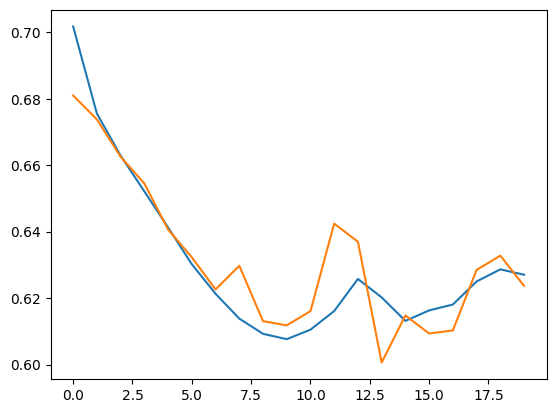

In [ ]:
plt.plot(rn.losses)
plt.plot(rn.val_losses)
plt.show()

In [ ]:
rn.score(x_val_onehot, y_val)

np.float64(0.649)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

In [ ]:
model = Sequential()

model.add(SimpleRNN(32, input_shape=(100,100)))
model.add(Dense(1, activation='sigmoid'))

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_4 (SimpleRNN)        │ (None, 32)             │         4,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,289 (16.75 KB)

 Trainable params: 4,289 (16.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train_onehot, y_train, epochs=20, batch_size=32, validation_data=(x_val_onehot, y_val))


Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - accuracy: 0.7066 - loss: 0.5692 - val_accuracy: 0.5782 - val_loss: 0.6681
Epoch 2/20


KeyboardInterrupt: 

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show ()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()


In [ ]:
loss, accuracy = model.evaluate(x_val_onehot, y_val, verbose=0)
print(accuracy)

In [83]:
from tensorflow.keras.layers import Embedding

In [90]:
(x_train_all, y_train_all), (x_test, y_test) = imdb.load_data(skip_top=20, num_words=1000)

for i in range(len(x_train_all)):
  x_train_all[i] = [w for w in x_train_all[i] if w>2]

x_train = x_train_all[random_index[:20000]]
y_train = y_train_all[random_index[:20000]]
x_val = x_train_all[random_index[20000:]]
y_val = y_train_all[random_index[20000:]]

In [91]:
maxlen = 100
x_train_seq = sequence.pad_sequences(x_train, maxlen=maxlen)
x_val_seq = sequence.pad_sequences(x_val, maxlen=maxlen)


In [94]:
model_ebd = Sequential()

model_ebd.add(Embedding(1000,32))

model_ebd.add(SimpleRNN(32))
model_ebd.add(Dense(1,activation='sigmoid'))

model_ebd.summary()


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_9 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [95]:
model_ebd.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model_ebd.fit(x_train_seq, y_train, epochs=10, batch_size=32, validation_data=(x_val_seq, y_val))

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.6258 - loss: 0.6249 - val_accuracy: 0.7892 - val_loss: 0.4546
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.8223 - loss: 0.4000 - val_accuracy: 0.8096 - val_loss: 0.4306
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.8630 - loss: 0.3322 - val_accuracy: 0.8170 - val_loss: 0.4279
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.8813 - loss: 0.2922 - val_accuracy: 0.8174 - val_loss: 0.4348
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.9163 - loss: 0.2186 - val_accuracy: 0.8150 - val_loss: 0.4787
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.9311 - loss: 0.1854 - val_accuracy: 0.7974 - val_loss: 0.5311
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.9471 - loss: 0.1477 - val_accuracy: 0.8024 - val_loss: 0.5781
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.9605 - loss: 0.1155 - 

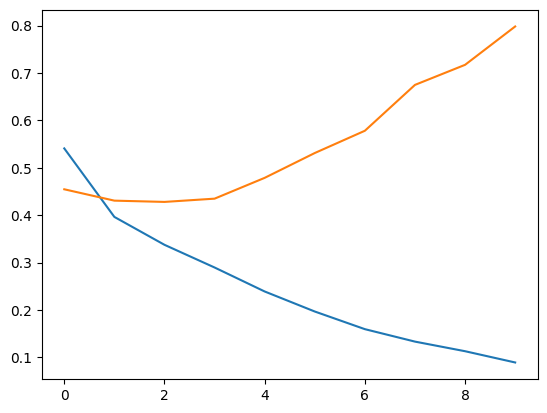

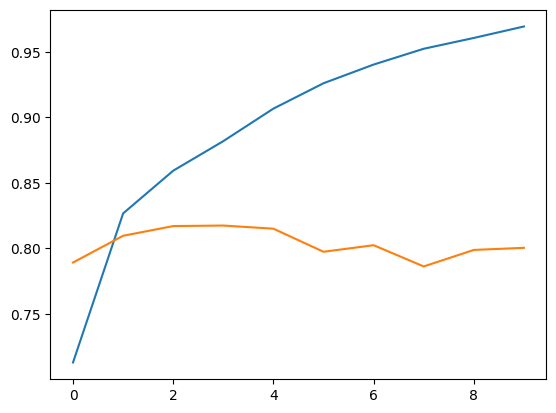

In [96]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [105]:
loss, accuracy = model_ebd.evaluate(x_val_seq, y_val, verbose=0)
print(accuracy)

0.8004000186920166


In [100]:
from tensorflow.keras.layers import LSTM

model_lstm = Sequential()

model_lstm.add(Embedding(1000,32))
model_lstm.add(LSTM(8))
model_lstm.add(Dense(1, activation='sigmoid'))

model_lstm.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_12 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [101]:
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model_lstm.fit(x_train_seq, y_train, epochs=10, batch_size=32, validation_data=(x_val_seq, y_val))

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - accuracy: 0.7108 - loss: 0.5605 - val_accuracy: 0.8332 - val_loss: 0.3986
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.8521 - loss: 0.3603 - val_accuracy: 0.8428 - val_loss: 0.3725
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.8679 - loss: 0.3191 - val_accuracy: 0.8398 - val_loss: 0.3628
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.8804 - loss: 0.2942 - val_accuracy: 0.8378 - val_loss: 0.3687
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.8867 - loss: 0.2762 - val_accuracy: 0.8312 - val_loss: 0.3793
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - accuracy: 0.8853 - loss: 0.2719 - val_accuracy: 0.8476 - val_loss: 0.3756
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.8969 - loss: 0.2491 - val_accuracy: 0.8366 - val_loss: 0.3895
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.9012 - loss: 0.2431 - 

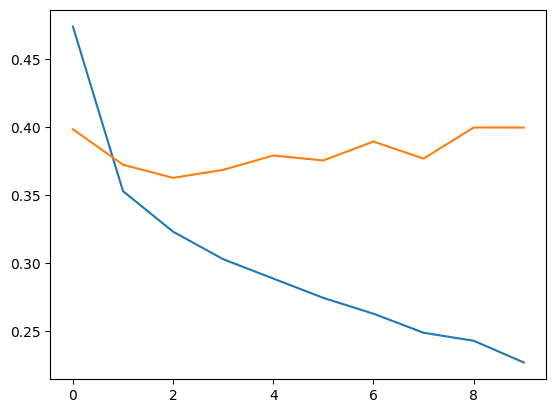

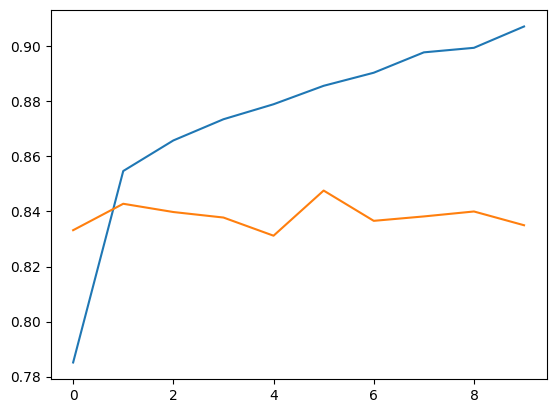

In [104]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [103]:
loss, accuracy = model_lstm.evaluate(x_val_seq, y_val, verbose=0)
print(accuracy)

0.8349999785423279
